In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'

df = pd.read_csv("../data/zomato_cleaned.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine List
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,yes,no,no,No,3,4.8,Dark Green,Excellent,314,"['French', 'Japanese', 'Desserts']"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,yes,no,no,No,3,4.5,Dark Green,Excellent,591,['Japanese']
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,yes,no,no,No,4,4.4,Green,Very Good,270,"['Seafood', 'Asian', 'Filipino', 'Indian']"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,no,no,no,No,4,4.9,Dark Green,Excellent,365,"['Japanese', 'Sushi']"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,yes,no,no,No,4,4.8,Dark Green,Excellent,229,"['Japanese', 'Korean']"


C:\Users\hp\AppData\Local\Temp\ipykernel_21380\1277625483.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




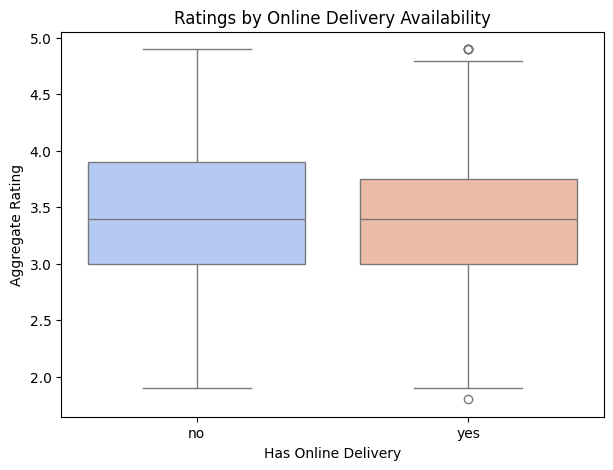

In [2]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='coolwarm')
plt.title("Ratings by Online Delivery Availability")
plt.xlabel("Has Online Delivery")
plt.ylabel("Aggregate Rating")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_21380\447285877.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




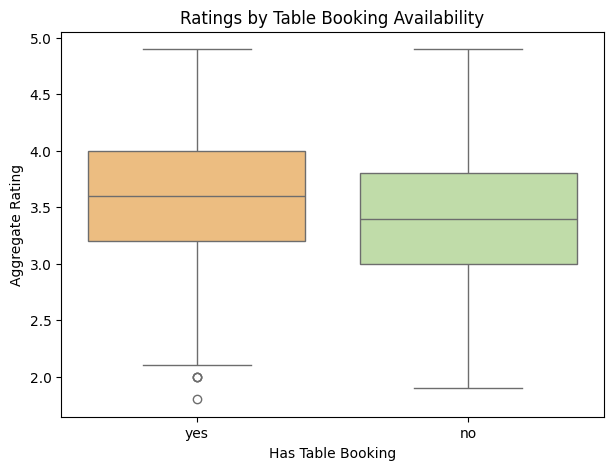

In [3]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Spectral')
plt.title("Ratings by Table Booking Availability")
plt.xlabel("Has Table Booking")
plt.ylabel("Aggregate Rating")
plt.show()


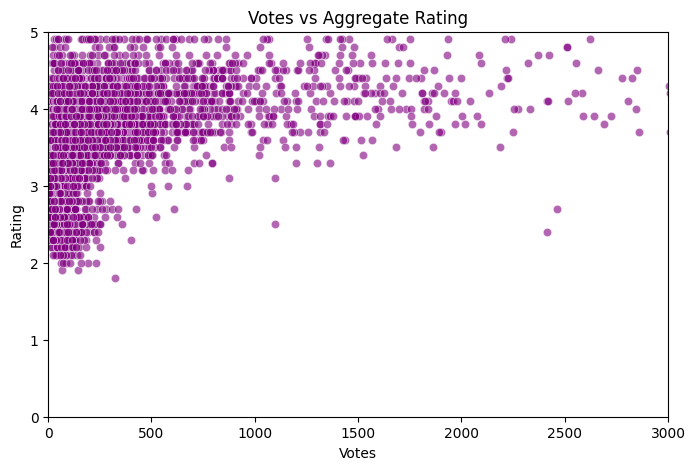

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.6, color='purple')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.xlim(0, 3000)
plt.ylim(0, 5)
plt.show()


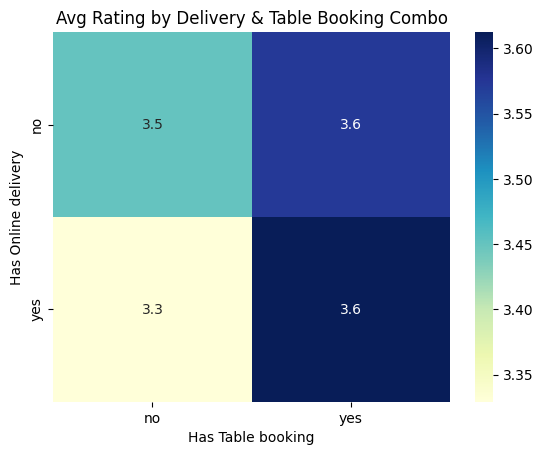

In [5]:
heat_data = df.pivot_table(index='Has Online delivery', 
                           columns='Has Table booking', 
                           values='Aggregate rating', 
                           aggfunc='mean')

sns.heatmap(heat_data, annot=True, cmap='YlGnBu')
plt.title("Avg Rating by Delivery & Table Booking Combo")
plt.show()


## 🔍 Insights
- Delivery-only restaurants might receive slightly lower ratings due to speed vs quality trade-offs.
- Table booking shows a noticeable uplift in customer satisfaction.
- There is some correlation between votes and high ratings, but not always.
